In [1]:
# 1. Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [2]:
# 2. Đọc file csv và gắng index với giá Close
data = pd.read_csv('PVS Historical Data.csv')

# Tiền xử lí dữ liệu
# Hàm chuyển đổi "Vol." từ chuỗi sang số
def convert_volume_to_number(volume_str):
    if volume_str[-1] == 'K':
        return int(float(volume_str[:-1]) * 1000)
    elif volume_str[-1] == 'M':
        return int(float(volume_str[:-1]) * 1000000)
    elif volume_str[-1] == 'B':
        return int(float(volume_str[:-1]) * 1000000000)
    else:
        return int(volume_str)
    
# Áp dụng hàm chuyển đổi cho cột "Vol."
data["Vol."] = data["Vol."].apply(convert_volume_to_number)

# Hàm chuyển đổi "Change %" từ chuỗi sang số
def convert_change_to_number(change_str):
    new_change = float(change_str.strip('%')) / 100
    return new_change

# Áp dụng hàm chuyển đổi cho cột "Change %"
data["Change %"] = data["Change %"].apply(convert_change_to_number)

# Hàm chuyển giá từ chuỗi sang số
def convert_str_to_number(str):
    return float(str.replace(',', ''))

# Áp dụng hàm chuyển đổi cho các cột giá trị
data['Price'] = data['Price'].apply(convert_str_to_number)
data['Open'] = data['Open'].apply(convert_str_to_number)
data['High'] = data['High'].apply(convert_str_to_number)
data['Low'] = data['Low'].apply(convert_str_to_number)

data

df1=data.reset_index()['Price']

In [3]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [4]:
# 4. Chia train test
train_size = int(0.75 * len(df1))
test_size = int(0.15 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [5]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [6]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 30
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [7]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [8]:
# 8. Define LSTM Model

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(time_step, 1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [9]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
16/16 [==============================] - 8s 123ms/step - loss: 0.0272 - val_loss: 0.0211
Epoch 2/100
16/16 [==============================] - 1s 36ms/step - loss: 0.0059 - val_loss: 0.0116
Epoch 3/100
16/16 [==============================] - 1s 34ms/step - loss: 0.0042 - val_loss: 0.0095
Epoch 4/100
16/16 [==============================] - 1s 43ms/step - loss: 0.0036 - val_loss: 0.0105
Epoch 5/100
16/16 [==============================] - 1s 34ms/step - loss: 0.0035 - val_loss: 0.0112
Epoch 6/100
16/16 [==============================] - 1s 36ms/step - loss: 0.0035 - val_loss: 0.0096
Epoch 7/100
16/16 [==============================] - 1s 37ms/step - loss: 0.0033 - val_loss: 0.0083
Epoch 8/100
16/16 [==============================] - 1s 35ms/step - loss: 0.0034 - val_loss: 0.0096
Epoch 9/100
16/16 [==============================] - 1s 35ms/step - loss: 0.0031 - val_loss: 0.0075
Epoch 10/100
16/16 [==============================] - 1s 40ms/step - loss: 0.0031 - val_loss: 0.007

16/16 [==============================] - 1s 36ms/step - loss: 5.1569e-04 - val_loss: 0.0015
Epoch 81/100
16/16 [==============================] - 1s 32ms/step - loss: 5.2223e-04 - val_loss: 0.0017
Epoch 82/100
16/16 [==============================] - 1s 36ms/step - loss: 5.3537e-04 - val_loss: 0.0016
Epoch 83/100
16/16 [==============================] - 1s 33ms/step - loss: 5.8751e-04 - val_loss: 0.0015
Epoch 84/100
16/16 [==============================] - 1s 35ms/step - loss: 5.2595e-04 - val_loss: 0.0016
Epoch 85/100
16/16 [==============================] - 1s 37ms/step - loss: 5.3601e-04 - val_loss: 0.0015
Epoch 86/100
16/16 [==============================] - 1s 34ms/step - loss: 4.9224e-04 - val_loss: 0.0015
Epoch 87/100
16/16 [==============================] - 1s 33ms/step - loss: 4.9484e-04 - val_loss: 0.0020
Epoch 88/100
16/16 [==============================] - 1s 33ms/step - loss: 7.2963e-04 - val_loss: 0.0015
Epoch 89/100
16/16 [==============================] - 1s 37ms/step -

In [10]:
# 10. Dự báo dữ liệu test, val
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

y_pred_new = scaler.inverse_transform(y_pred.reshape(1, -1))
y_test_new = scaler.inverse_transform(np.array([ytest], dtype=np.float32))

4/4 [==============================] - 0s 11ms/step


In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
# Hàm tính MDA
def calculate_mda(y_true, y_pred):
    y_true_diff = np.diff(y_true)
    y_pred_diff = np.diff(y_pred)
    correct_direction = np.sign(y_true_diff) == np.sign(y_pred_diff)
    return np.mean(correct_direction) * 100

# Tính toán RMSE, MAE và MAPE trên tập test
test_score_rmse = np.sqrt(mean_squared_error(y_test_new, y_pred_new))
test_score_mape = mean_absolute_percentage_error(y_test_new, y_pred_new) * 100
test_score_mda = calculate_mda(y_test_new, y_pred_new)

print('RMSE trên tập test là:', test_score_rmse)
print('MAPE trên tập test là:', test_score_mape, '%')
print('MDA trên tập test là:', test_score_mda, '%')

RMSE trên tập test là: 1110.3396
MAPE trên tập test là: 3.417504206299782 %
MDA trên tập test là: 43.35260115606936 %


In [12]:
# 13. Dự báo 30 ngày tiếp theo
x_input=val_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=x_input.shape[1]
i=0
while(i<30):
    
    if(len(temp_input)>x_input.shape[1]):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


[0.82248175]
79
1 day input [0.56997665 0.57341025 0.58371103 0.61804697 0.60774619 0.59744541
 0.60431259 0.61117978 0.63521494 0.62148057 0.59744541 0.58714462
 0.54594149 0.58714462 0.55624227 0.56310946 0.51503914 0.52533993
 0.5390743  0.5425079  0.55624227 0.55624227 0.56310946 0.55967587
 0.55967587 0.56310946 0.59744541 0.59401181 0.59744541 0.57341025
 0.58027743 0.57341025 0.58714462 0.58714462 0.59744541 0.56997665
 0.56997665 0.58027743 0.56997665 0.55967587 0.54594149 0.54937509
 0.54594149 0.55967587 0.54937509 0.55967587 0.55280868 0.55280868
 0.57341025 0.58027743 0.58371103 0.58714462 0.59401181 0.57341025
 0.60774619 0.59744541 0.60431259 0.6626837  0.67641807 0.70388683
 0.70388683 0.73478918 0.73135558 0.71762121 0.74165637 0.75539074
 0.74165637 0.75539074 0.75882434 0.75539074 0.75539074 0.74165637
 0.74165637 0.75195715 0.75195715 0.73822277 0.82406263 0.82248175]
1 day output [[0.80980027]]
2 day input [0.57341025 0.58371103 0.61804697 0.60774619 0.59744541 0.60

12 day output [[0.7130049]]
13 day input [0.54594149 0.58714462 0.55624227 0.56310946 0.51503914 0.52533993
 0.5390743  0.5425079  0.55624227 0.55624227 0.56310946 0.55967587
 0.55967587 0.56310946 0.59744541 0.59401181 0.59744541 0.57341025
 0.58027743 0.57341025 0.58714462 0.58714462 0.59744541 0.56997665
 0.56997665 0.58027743 0.56997665 0.55967587 0.54594149 0.54937509
 0.54594149 0.55967587 0.54937509 0.55967587 0.55280868 0.55280868
 0.57341025 0.58027743 0.58371103 0.58714462 0.59401181 0.57341025
 0.60774619 0.59744541 0.60431259 0.6626837  0.67641807 0.70388683
 0.70388683 0.73478918 0.73135558 0.71762121 0.74165637 0.75539074
 0.74165637 0.75539074 0.75882434 0.75539074 0.75539074 0.74165637
 0.74165637 0.75195715 0.75195715 0.73822277 0.82406263 0.82248175
 0.80980027 0.79673934 0.78748691 0.77919304 0.77063727 0.76180393
 0.7528978  0.74409997 0.73557085 0.72745883 0.71989846 0.71300489]
13 day output [[0.70686966]]
14 day input [0.58714462 0.55624227 0.56310946 0.51503914 

24 day output [[0.69086623]]
25 day input [0.55967587 0.56310946 0.59744541 0.59401181 0.59744541 0.57341025
 0.58027743 0.57341025 0.58714462 0.58714462 0.59744541 0.56997665
 0.56997665 0.58027743 0.56997665 0.55967587 0.54594149 0.54937509
 0.54594149 0.55967587 0.54937509 0.55967587 0.55280868 0.55280868
 0.57341025 0.58027743 0.58371103 0.58714462 0.59401181 0.57341025
 0.60774619 0.59744541 0.60431259 0.6626837  0.67641807 0.70388683
 0.70388683 0.73478918 0.73135558 0.71762121 0.74165637 0.75539074
 0.74165637 0.75539074 0.75882434 0.75539074 0.75539074 0.74165637
 0.74165637 0.75195715 0.75195715 0.73822277 0.82406263 0.82248175
 0.80980027 0.79673934 0.78748691 0.77919304 0.77063727 0.76180393
 0.7528978  0.74409997 0.73557085 0.72745883 0.71989846 0.71300489
 0.70686966 0.70155936 0.69711304 0.69354302 0.6908356  0.68895388
 0.6878404  0.68742073 0.68760931 0.68831193 0.68943024 0.69086623]
25 day output [[0.6925242]]
26 day input [0.56310946 0.59744541 0.59401181 0.59744541 

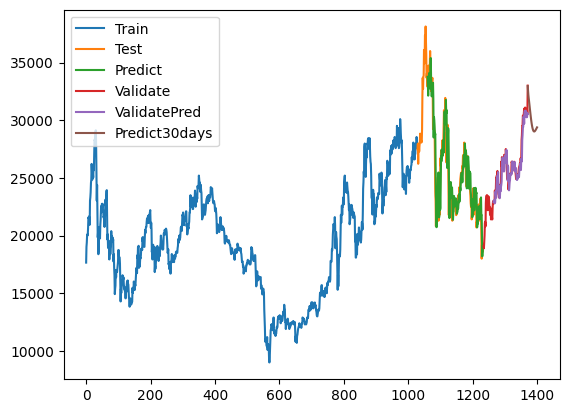

In [13]:
# 14.Vẽ hình
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+31, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+31, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(y_pred_val))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()